In [1]:
"""
Check all datasets
"""
%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
from ipywidgets import interact
from ipywidgets import Controller

from collections import defaultdict
import numpy as np
import os
import sys
import itertools
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from pprint import pprint
import regex as re
sys.path.append('/export/home/asanakoy/workspace/neural_network')
sys.path.append('/export/home/asanakoy/workspace/art_datasets')
sys.path.append('/export/home/asanakoy/workspace/dataset_merger')
import make_data.dataset
import wikiart.info.preprocess_info
from art_utils.pandas_tools import is_null_object
from art_utils.text_tools import extract_all_years
import dataset_merger.read_datasets
import dataset_merger.pymongoext as pymongoext
from dataset_merger.match_artists import fix_sim_matrix
from dataset_merger.match_artists import generate_matches_for_manual_check
from dataset_merger.match_artists import get_num_top_matches
from dataset_merger.match_artists import compute_sim_matrix, get_sim_between_rows
from dataset_merger.match_artists import find_connected_components
from dataset_merger.match_artists import combine_artists
from dataset_merger.match_artists import get_merged_artists_df
import dataset_merger.prepare_artists as prepare_artists
from dataset_merger.prepare_artists import get_artists_with_years

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 160)
pd.set_option('display.max_colwidth', 50)  
pd.set_option('display.max_columns', None) 

# todo: merge wga, wikiart, artuk, googleart (dates checked)
# todo: make uniform dates (bio or active if no bio available) range for every artist in the dataset

# todo: check dates on others
# todo: chach should we split naems on `&` for other datasets (beyound artuk, wikiart, googleart, wga)
# TOD: manually check connected components (wga, artuk)

In [2]:
dfs = dataset_merger.read_datasets.read_datasets()

artuk None
artuk None 207585
googleart None
googleart None 102343
moma None
moma None 24708
rijks None
rijks None 93206
wga None
wga None 35373
wiki None
wiki None 131770
meisterwerke None
meisterwerke None 19647
Total works count: 614632
time: 17.5 s


In [3]:
# for key, df in dfs.iteritems():
#     print key
#     print df.columns
#     print '==='
    

# print '--'
# artist_names = np.unique(artist_names)
# print 'Total unique artists num:', len(artist_names)
# return artist_names

time: 3.84 ms


In [4]:
artists_with_years_dict = dict()
artists_with_years_dict['googleart'] = get_artists_with_years('googleart', dfs)
artists_with_years_dict['wiki'] = get_artists_with_years('wiki', dfs)
artists_with_years_dict['wga'] = get_artists_with_years('wga', dfs)
artists_with_years_dict['artuk'] = get_artists_with_years('artuk', dfs)
artists_with_years_dict['meisterwerke'] = get_artists_with_years('meisterwerke', dfs)
artists_with_years_dict['moma'] = get_artists_with_years('moma', dfs)

:: googleart


  0%|          | 0/4222 [00:00<?, ?it/s] 26%|██▌       | 1095/4222 [00:00<00:00, 10945.73it/s]

with url_wiki: 3074


100%|██████████| 4222/4222 [00:00<00:00, 9351.70it/s]  56%|█████▋    | 2376/4222 [00:00<00:00, 8050.09it/s]


Total artists: 4222
Drop artists with NaN years_range 138
Drop 1 unknown artists
Total artists: 4083
:: wiki


  0%|          | 0/2384 [00:00<?, ?it/s] 52%|█████▏    | 1237/2384 [00:00<00:00, 12367.15it/s]

with url_wiki: 2081


100%|██████████| 2384/2384 [00:00<00:00, 12300.71it/s]


Total artists: 2384
Drop artists with NaN years_range 6
Drop 0 unknown artists
Total artists: 2378
:: wga


  0%|          | 0/4573 [00:00<?, ?it/s] 18%|█▊        | 816/4573 [00:00<00:00, 8158.30it/s]

with url_wiki: 26


100%|██████████| 4573/4573 [00:00<00:00, 10539.83it/s]62%|██████▏   | 2857/4573 [00:00<00:00, 9063.45it/s]


Total artists: 4573
Drop artists with NaN years_range 0
Drop 0 unknown artists
Total artists: 4573
:: artuk


  0%|          | 0/36654 [00:00<?, ?it/s]  4%|▍         | 1502/36654 [00:00<00:02, 15013.11it/s]

with url_wiki: 0


100%|██████████| 36654/36654 [00:02<00:00, 12867.42it/s]11%|█         | 4016/36654 [00:00<00:02, 13177.01it/s]


Total artists: 36654
Drop artists with NaN years_range 3604
Drop 0 unknown artists
Total artists: 33050
:: meisterwerke


  0%|          | 0/2268 [00:00<?, ?it/s] 41%|████      | 932/2268 [00:00<00:00, 9313.13it/s]

with url_wiki: 3


 89%|████████▉ | 2015/2268 [00:00<00:00, 9720.59it/s]100%|██████████| 2268/2268 [00:00<00:00, 10396.71it/s]


Total artists: 2268
Drop artists with NaN years_range 33
Drop 17 unknown artists
Total artists: 2218
:: moma


  0%|          | 0/15247 [00:00<?, ?it/s] 10%|▉         | 1498/15247 [00:00<00:00, 14976.27it/s]

with url_wiki: 0


100%|██████████| 15247/15247 [00:01<00:00, 13520.19it/s]30%|███       | 4605/15247 [00:00<00:00, 15263.13it/s]


Total artists: 15247
Drop artists with NaN years_range 3576
Drop 1 unknown artists
Total artists: 11670
time: 18.2 s


In [5]:
# artcyclopedia_artists = pymongoext.get_db_entries('129.206.117.36', 27017, 'artcyclopedia', 'found')
# for x in artcyclopedia_artists:
#     x['artcylopedia_name'] = x['name']
#     del x['name']
#     del x['_id']
#     if 'content' in x:
#         del x['content']
# print len(artcyclopedia_artists)
# print artcyclopedia_artists[:2]

# artcyclopedia_df = pd.DataFrame.from_dict(artcyclopedia_artists)
# artcyclopedia_df.index = artcyclopedia_df['artist_name']
# artcyclopedia_df.rename(columns={'url': 'url_artcyclopedia'}, inplace=True)

# # artists_df['url_artcyclopedia'] = artcyclopedia_df.loc[artist_names, 'url_artcyclopedia'].values
# # print pd.notnull(artists_df['url_artcyclopedia']).sum()
# print len(artcyclopedia_df)
# print len(artcyclopedia_df['url_artcyclopedia'].unique())


# artcyclopedia_df

time: 3.94 ms


In [6]:
def get_sim_matrix(dataset_names, shape=None, force=False, n_jobs=1, num_blocks=None):
    assert len(dataset_names) == 2
    str_name = '-'.join(dataset_names)
    matrix_filepath = 'sim_matrix_{}.npy'.format(str_name)
    if os.path.exists(matrix_filepath) and not force:
        sim = np.load(matrix_filepath)
        if shape is not None:
            assert shape == sim.shape, '{} != {}'.format(shape, sim.shape)
    else:
        sim = compute_sim_matrix(keys, artists_with_years_dict, n_jobs=n_jobs, num_blocks=num_blocks)
        np.save(matrix_filepath, sim)
        print 'Sim matrix saved to {}'.format(matrix_filepath)
    return sim

def get_sim_matrix_and_plot(dataset_names, force=False, n_jobs=1, num_blocks=None):
    str_name = '-'.join(dataset_names)
    print str_name
    shape = tuple([len(artists_with_years_dict[dataset_names[i]]) for i in xrange(2)])
    sim_matrix[str_name] = get_sim_matrix(dataset_names, shape=shape, force=force, 
                                          n_jobs=n_jobs, num_blocks=num_blocks)
    print sim_matrix[str_name].shape
    best_sim = sim_matrix[str_name].max(axis=1)
    plt.hist(best_sim)
    plt.show()

sim_matrix = dict()

time: 23.6 ms


In [7]:
def check_pairs(dataset_names, transpose=False, 
                min_sim=85, max_sim=100, 
                discard_exaclty_matched_dates=False,
                min_k=1, min_total_works_count=0):
    assert len(dataset_names) == 2
    sim = sim_matrix['-'.join(dataset_names)]
    dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

    manually_checked_matches_path = 'manually_corrected_matches/{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
    print manually_checked_matches_path
    if os.path.exists(manually_checked_matches_path):
        manually_checked_matches_df = pd.read_csv(manually_checked_matches_path, index_col=0, encoding='utf-8')
        print 'manually checked pairs:', len(manually_checked_matches_df)
        sim = fix_sim_matrix(dataset_names, 
                             dfs_to_merge, 
                             sim, 
                             manually_checked_matches_df)
    
    if transpose:
        # Transpose matches
        dataset_names = dataset_names[::-1]
        dfs_to_merge = dfs_to_merge[::-1]
        sim = sim.transpose()

    results_df = generate_matches_for_manual_check(dataset_names, dfs_to_merge, 
                                                   sim, min_sim=min_sim, max_sim=max_sim,
                                                   discard_exaclty_matched_dates=discard_exaclty_matched_dates,
                                                   min_k=min_k, 
                                                   min_total_works_count=min_total_works_count)
    output_path = '/export/home/asanakoy/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names))
    results_df.to_csv(output_path, encoding='utf-8')
    return results_df

time: 21.3 ms


In [8]:
def correct_ids_in_manually_checked_matches(dataset_names):
    """
        Check each pair in manually_checked_matches and change $artist_id to one from 'artist_ids' list (if possible)
        if $artist_id is not currently in index of the artist_df
    """
    
    manually_checked_matches_path = 'manually_corrected_matches/{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
    if not os.path.exists(manually_checked_matches_path):
        raise IOError('File {} not found'.format(manually_checked_matches_path))
    manually_checked_matches_df = pd.read_csv(manually_checked_matches_path, index_col=0, encoding='utf-8')
    print 'manually checked pairs:', len(manually_checked_matches_df)

    dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]
    
    def convert_to_valid_idx(artists_df, artist_id):
        if artist_id not in artists_df.index:
            found_idxs = np.nonzero(artists_df['artist_ids'].apply(lambda x: artist_id in x))[0]
            if len(found_idxs):
                assert len(found_idxs) == 1, '{}: {}'.format(artist_id, found_idxs)
                artist_id = artists_df.index[found_idxs[0]]
        return artist_id
        
    
    def is_valid_pairs(row):
        for i in xrange(2):
            artist_id = row['artist_id_' + dataset_names[i]]
            if artist_id not in dfs_to_merge[i].index:
                return False
        return True
    
    is_valid = manually_checked_matches_df.apply(is_valid_pairs, axis=1)
    print 'not valid before fixes:', (~is_valid).sum()
    print manually_checked_matches_df[~is_valid]
    
    for i in xrange(2):
        manually_checked_matches_df['artist_id_' + dataset_names[i]] = \
            manually_checked_matches_df['artist_id_' + dataset_names[i]] \
            .apply(lambda x: convert_to_valid_idx(dfs_to_merge[i], x))
    
    is_valid = manually_checked_matches_df.apply(is_valid_pairs, axis=1)
    print 'not valid', (~is_valid).sum()
    print manually_checked_matches_df[~is_valid]
    return manually_checked_matches_df

# dataset_names = ['wiki+googleart', 'wga']
# dataset_names = ['wiki+googleart+wga', 'meisterwerke']
# manually_checked_matches_df = correct_ids_in_manually_checked_matches(dataset_names)
# manually_checked_matches_path = 'manually_corrected_matches/{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
# manually_checked_matches_df.to_csv(manually_checked_matches_path, encoding='utf-8')

time: 50.5 ms


In [9]:
# def fix_wga_ids(matches_df):
    
#     def years_range_to_suffix(years_range):
#         if not isinstance(years_range, float):
#             assert isinstance(years_range, list)
#             return ', ({}-{})'.format(*np.asarray(years_range, dtype=int))
#         else:
#             return ''
    
#     matches_df = matches_df.copy()
#     fixed_bio_df = pd.read_csv('/export/home/asanakoy/workspace/wga/info/duplicate_artists_fixed_bio.csv', encoding='utf-8', header=0)
#     for row in fixed_bio_df.itertuples():
#         new_years_bio = map(int, re.split(r',|-', row.fixed_bio.strip()))
#         mask = matches_df['artist_id_wga'] == row.artist_id
#         matches_df.loc[mask, 'dates_wga'] = matches_df.loc[mask, 'dates_wga'].apply(lambda _: new_years_bio)
#         matches_df.loc[mask, 'artist_id_wga'] = matches_df.loc[mask, 'artist_id_wga'].apply(lambda x: x.rsplit(',', 1)[0] + 
#                                                                            years_range_to_suffix(new_years_bio))
#     return matches_df

# dataset_names = ['wiki+googleart', 'wga']
# manually_checked_matches_df = fix_wga_ids(manually_checked_matches_df)
# manually_checked_matches_path = 'manually_corrected_matches/{}_manually_corrected_matches.csv'.format('-'.join(dataset_names))
# manually_checked_matches_df.to_csv(manually_checked_matches_path, encoding='utf-8')

time: 4.39 ms


In [10]:
%autoreload

time: 31 ms


wiki-googleart


  0%|          | 0/512 [00:00<?, ?it/s]

Num tasks: 512


100%|██████████| 512/512 [04:09<00:00,  1.80it/s]
[Parallel(n_jobs=16)]: Done 512 out of 512 | elapsed:  4.3min finished


Sim matrix saved to sim_matrix_wiki-googleart.npy
(2378, 4083)


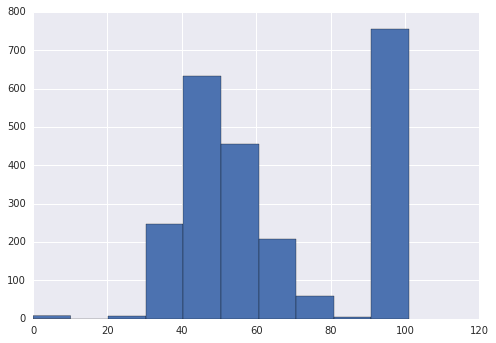

time: 4min 22s


In [11]:
keys = ['wiki', 'googleart']
get_sim_matrix_and_plot(keys, force=True, n_jobs=16, num_blocks=512)

# keys = ['wga', 'artuk']
# get_sim_matrix_and_plot(keys)

In [12]:
%autoreload
dataset_names = ['wiki', 'googleart']
results_df = check_pairs(dataset_names, 
                transpose=False,
                min_sim=76, max_sim=101, 
                discard_exaclty_matched_dates=True,
                min_k=1)

if len(results_df):
    results_df['year_diff'] = results_df.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)
results_df

# Transposed
results_df_transposed = check_pairs(dataset_names, 
                transpose=True,
                min_sim=76, max_sim=101, 
                discard_exaclty_matched_dates=True,
                min_k=1)
if len(results_df_transposed):
    results_df_transposed['year_diff'] = results_df_transposed.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)

if len(results_df):
    appended = results_df.append(results_df_transposed, ignore_index=True)
    appended = appended.drop_duplicates(['artist_id_' + key for key in dataset_names])
    appended = appended[results_df.columns]
else:
    appended = results_df_transposed

# appended = results_df
output_path = '/export/home/asanakoy/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names))
appended.to_csv(output_path, encoding='utf-8')
print 'Total rows', len(appended)
appended

manually_corrected_matches/wiki-googleart_manually_corrected_matches.csv
manually checked pairs: 185
count: 0
0
manually_corrected_matches/wiki-googleart_manually_corrected_matches.csv
manually checked pairs: 185
count: 0
0
Total rows 0


""


time: 2.27 s


In [13]:
def check_sim_values(dataset_names, artist_ids):
    cur_dfs = [artists_with_years_dict[key] for key in dataset_names]
    indices = [0, 0]
    for i in xrange(2):
        idx = np.nonzero(cur_dfs[i]['artist_id'] == artist_ids[i])[0][0]
        print cur_dfs[i].iloc[idx]
        print '---'
        indices[i] = idx
    print indices
    sim = get_sim_matrix(dataset_names, force=False)
    print 'sim=', sim[indices[0], indices[1]]

check_sim_values(['wiki', 'googleart'], ['wiki_johan-hendrik-weissenbruch', 'googleart_m026t8y5'])

art_institution                                                         NaN
art_movement                                                      [realism]
artist_id                                   wiki_johan-hendrik-weissenbruch
artist_name                                      johan hendrik weissenbruch
birth_date                                                     19 june 1824
death_date                                                    24 march 1903
description                                                             NaN
field                                                            [painting]
friends_and_co-workers                                                  NaN
genre                                                           [landscape]
influenced_by                                                           NaN
influenced_on                                                           NaN
nationality                                                         [dutch]
painting_sch

In [14]:
dataset_names = ['wiki', 'googleart']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

merged_df = get_merged_artists_df(dataset_names, dfs_to_merge, sim, allow_big_components=False)
artists_with_years_dict['wiki+googleart'] = merged_df

  0%|          | 0/2378 [00:00<?, ?it/s]  0%|          | 9/2378 [00:00<00:26, 88.40it/s]

connected_components at the beginning: 6461


  1%|          | 67/5710 [00:00<00:08, 664.22it/s]

connected_components: 5710
big_components number: 0


100%|██████████| 5710/5710 [00:06<00:00, 862.64it/s] 4%|▍         | 225/5710 [00:00<00:07, 716.68it/s]


time: 37.4 s


wiki+googleart-wga


  0%|          | 0/5710 [00:00<?, ?it/s]

Num tasks: 5710


100%|██████████| 5710/5710 [10:19<00:00,  9.22it/s]
[Parallel(n_jobs=16)]: Done 5710 out of 5710 | elapsed: 10.3min finished


Sim matrix saved to sim_matrix_wiki+googleart-wga.npy
(5710, 4573)


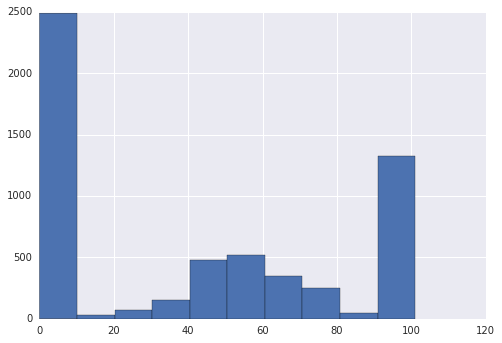

time: 10min 25s


In [15]:
%autoreload
keys = ['wiki+googleart', 'wga']
get_sim_matrix_and_plot(keys, force=True, n_jobs=16)

In [16]:
%autoreload
dataset_names = ['wiki+googleart', 'wga']
results_df = check_pairs(dataset_names, 
                transpose=False,
                min_sim=80, max_sim=121, 
                discard_exaclty_matched_dates=False,
                min_k=2)

if len(results_df):
    results_df['year_diff'] = results_df.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)
results_df

# Transposed
results_df_transposed = check_pairs(dataset_names, 
                transpose=True,
                min_sim=80, max_sim=121, 
                discard_exaclty_matched_dates=False,
                min_k=2)
if len(results_df_transposed):
    results_df_transposed['year_diff'] = results_df_transposed.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)

if len(results_df):
    appended = results_df.append(results_df_transposed, ignore_index=True)
    appended = appended.drop_duplicates(['artist_id_wga', 'artist_id_wiki+googleart'])
    appended = appended[results_df.columns]
else:
    appended = results_df_transposed

# appended = results_df
output_path = '/export/home/asanakoy/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names))
appended.to_csv(output_path, encoding='utf-8')
print 'Total rows', len(appended)
appended

manually_corrected_matches/wiki+googleart-wga_manually_corrected_matches.csv
manually checked pairs: 718
count: 0
0
manually_corrected_matches/wiki+googleart-wga_manually_corrected_matches.csv
manually checked pairs: 718
count: 0
0
Total rows 0


""


time: 7.89 s


In [17]:
# artists_with_years_dict['googleart']['url_wiki'] = artists_with_years_dict['googleart']['url_wiki'].apply(lambda x: 'https://en.wikipedia.org/wiki/ernest_meissonier' if x == 'http://en.wikipedia.org/wiki/jean-louis-ernest_meissonier' else x)


# ids = list()
# for comp in big_comp_wiki_googleart:
#     comp = sorted(list(comp))http://localhost:8893/notebooks/dataset_merger/aggregated/match_artists.ipynb#
#     ids.extend(comp[:2])
# artists_with_years_dict['wiki+googleart'][['artist_name', 'years_range', 'url_wiki']].iloc[ids]

time: 2.25 ms


In [18]:
dataset_names = ['wiki+googleart', 'wga']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

merged_df = get_merged_artists_df(dataset_names, dfs_to_merge, sim, allow_big_components=False)
artists_with_years_dict['+'.join(dataset_names)] = merged_df
merged_df.to_hdf('artists_{}.hdf5'.format('+'.join(dataset_names)), 'df', mode='w')
# merged_df

  0%|          | 0/5710 [00:00<?, ?it/s]  1%|          | 53/5710 [00:00<00:10, 524.04it/s]

connected_components at the beginning: 10283


  1%|          | 103/8915 [00:00<00:08, 1017.86it/s]

connected_components: 8915
big_components number: 0


100%|██████████| 8915/8915 [00:08<00:00, 1072.91it/s] 3%|▎         | 308/8915 [00:00<00:08, 1020.88it/s]


time: 25.6 s


In [19]:
artists_with_years_dict.keys()

['wiki',
 'wga',
 'wiki+googleart+wga',
 'artuk',
 'meisterwerke',
 'googleart',
 'moma',
 'wiki+googleart']

time: 3.64 ms


In [20]:
dataset_names = ['wiki', 'googleart', 'wga', 'wiki+googleart+wga']
for key in dataset_names:
    print '{}: {} unique artists'.format(key, len(artists_with_years_dict[key]))

wiki: 2378 unique artists
googleart: 4083 unique artists
wga: 4573 unique artists
wiki+googleart+wga: 8915 unique artists
time: 5.13 ms


wiki+googleart+wga-meisterwerke


  0%|          | 0/8915 [00:00<?, ?it/s]

Num tasks: 8915


100%|██████████| 8915/8915 [08:11<00:00, 21.95it/s]
[Parallel(n_jobs=16)]: Done 8915 out of 8915 | elapsed:  8.2min finished


Sim matrix saved to sim_matrix_wiki+googleart+wga-meisterwerke.npy
(8915, 2218)


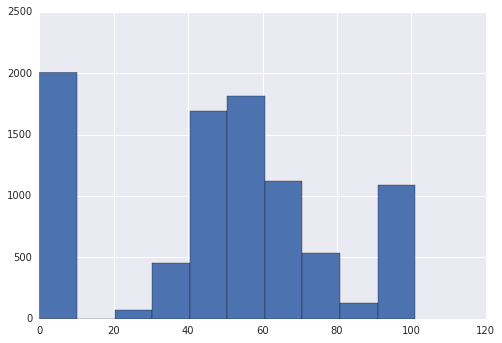

time: 8min 16s


In [21]:
##### MEISTERWERKE #######

%autoreload
keys = ['wiki+googleart+wga', 'meisterwerke']
get_sim_matrix_and_plot(keys, force=True, n_jobs=16)

In [22]:
def get_pairs_from_the_same_dataset(dataset_names, df, min_sim=102):
    df = df[df['score'] >= min_sim].copy()
    fir_ids_col = 'artist_id_' + dataset_names[0]
    sec_ids_col = 'artist_id_' + dataset_names[1]
    df.index = df[sec_ids_col]
    df_gr = pd.DataFrame(data={sec_ids_col: 
                            df.groupby(fir_ids_col)[sec_ids_col].apply(list)})
    df_gr['dates'] = df_gr[sec_ids_col].apply(lambda x: [df.at[el, 'dates_' + dataset_names[1]] for el in x])
    df_gr[sec_ids_col] = df_gr[sec_ids_col].apply(lambda x: ';'.join(x))
    return df_gr

time: 11.1 ms


In [23]:
##### MEISTERWERKE #######
%autoreload
dataset_names = ['wiki+googleart+wga', 'meisterwerke']
results_df = []
results_df = check_pairs(dataset_names, 
                transpose=False,
                min_sim=85, max_sim=101, 
                discard_exaclty_matched_dates=True,
                min_k=1,
                min_total_works_count=1)

if len(results_df):
    results_df['year_diff'] = results_df.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)
results_df

# Transposed
results_df_transposed = []
results_df_transposed = check_pairs(dataset_names, 
                transpose=True,
                min_sim=85, max_sim=101, 
                discard_exaclty_matched_dates=True,
                min_k=1,
                min_total_works_count=1)
if len(results_df_transposed):
    results_df_transposed['year_diff'] = results_df_transposed.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)

if len(results_df) and len(results_df_transposed):
    appended = results_df.append(results_df_transposed, ignore_index=True)
    appended = appended.drop_duplicates(['artist_id_' + key for key in dataset_names])
    appended = appended[results_df.columns]
#     assert len(appended['artist_id_meisterwerke'].unique()) == len(appended), len(appended['artist_id_meisterwerke'].unique())
    appended.sort_values(by='artist_id_wiki+googleart+wga', inplace=True)
elif len(results_df):
    appended = results_df
elif len(results_df_transposed):
    appended = results_df_transposed
else:
    appended = pd.DataFrame()
    
# appended.sort_values(by='artist_id_wiki+googleart+wga', inplace=True)
# appended.sort_values(by='artist_id_meisterwerke', inplace=True)


from os.path import expanduser
output_path = expanduser('~/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names)))
appended.to_csv(output_path, encoding='utf-8')
print 'Total rows', len(appended)
print dataset_names
appended
# duplicates_df = get_pairs_from_the_same_dataset(dataset_names[::-1], appended, min_sim=100)
# output_path = expanduser('~/workspace/dataset_merger/aggregated/{}_duplicates.csv'.format(dataset_names[1]))
# duplicates_df.to_csv(output_path, encoding='utf-8')
# duplicates_df

manually_corrected_matches/wiki+googleart+wga-meisterwerke_manually_corrected_matches.csv
manually checked pairs: 1403
count: 0
0
manually_corrected_matches/wiki+googleart+wga-meisterwerke_manually_corrected_matches.csv
manually checked pairs: 1403
count: 0
0
Total rows 0
['wiki+googleart+wga', 'meisterwerke']


""


time: 13.6 s


In [24]:
# results_df = appended1
# appended = results_df.append(results_df_transposed, ignore_index=True)
# appended = appended.drop_duplicates(['artist_id_' + key for key in dataset_names])
# appended = appended[results_df.columns]
# #     assert len(appended['artist_id_meisterwerke'].unique()) == len(appended), len(appended['artist_id_meisterwerke'].unique())
# appended.sort_values(by='artist_id_wiki+googleart+wga', inplace=True)
# appended.to_csv(output_path, encoding='utf-8')
# appended


time: 2.56 ms


In [25]:
##### MEISTERWERKE #######
dataset_names = ['wiki+googleart+wga', 'meisterwerke']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

# artists_with_years_dict['+'.join(dataset_names)] = get_merged_artists_df(dataset_names, dfs_to_merge, sim)


assert len(dataset_names) == len(dfs_to_merge)
assert sim.shape == (len(dfs_to_merge[0]), len(dfs_to_merge[1])), sim.shape


manually_checked_matches_path = 'manually_corrected_matches/{}_manually_corrected_matches.csv'.format(
    '-'.join(dataset_names))
if os.path.exists(manually_checked_matches_path):
    manually_checked_matches_df = pd.read_csv(manually_checked_matches_path, index_col=0,
                                              encoding='utf-8')
    sim = fix_sim_matrix(dataset_names,
                                dfs_to_merge,
                                sim,
                                manually_checked_matches_df)

connected_components = find_connected_components(sim, min_sim=100)
big_comp = [x for x in connected_components if len(x) > 2]
small_comp = [x for x in connected_components if len(x) <= 2]
# connected_components = small_comp + [{el} for x in big_comp for el in x]
# big_comp = [x for x in connected_components if len(x) > 2]

print 'num big_comp', len(big_comp)
# assert len(big_comp) == 0, len(big_comp)
big_comp

  0%|          | 0/8915 [00:00<?, ?it/s]  1%|          | 102/8915 [00:00<00:08, 1015.46it/s]

connected_components at the beginning: 11133


100%|██████████| 8915/8915 [00:11<00:00, 797.58it/s]  3%|▎         | 267/8915 [00:00<00:10, 856.05it/s] 


connected_components: 10000
num big_comp 0


[]

time: 17.1 s


In [26]:
# TODO: filter out big components. Recheck them
# TODO: merge images wga wiki. googleart
# these are mostly followers of the artists in the meisterwerke and workshops.
# But they have to be manually checked
big_comp
items_list = []
for comp in big_comp:
    for item_id in comp:
        df_idx = item_id / int(1e6)
#         if df_idx == 0:
#             continue
        artist_idx = item_id % int(1e6)
        items_list.append(dfs_to_merge[df_idx].iloc[artist_idx][['artist_id', 'artist_names', 'years_range']])
pd.DataFrame(items_list)

""


time: 10.7 ms


In [27]:
%autoreload
dataset_names = ['wiki+googleart+wga', 'meisterwerke']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

merged_df = get_merged_artists_df(dataset_names, dfs_to_merge, sim, 
                                  split_big_components=False, 
                                  allow_big_components=False)
artists_with_years_dict['+'.join(dataset_names)] = merged_df
print 'Num unique artists:', len(merged_df)
merged_df

  0%|          | 0/8915 [00:00<?, ?it/s]  1%|          | 105/8915 [00:00<00:08, 1045.10it/s]

connected_components at the beginning: 11133


  1%|          | 102/10000 [00:00<00:09, 1013.43it/s]

connected_components: 10000
big_components number: 0


100%|██████████| 10000/10000 [00:09<00:00, 1013.11it/s]3%|▎         | 259/10000 [00:00<00:11, 884.83it/s]


Num unique artists: 10000


,art_institution,art_movement,artist_id_degruyter,artist_ids,artist_name,artist_names,bio,birth_date,born-died,date_of_birth,date_of_death,death_date,description,field,friends_and_co-workers,gender,genre,geographical_data,influenced_by,influenced_on,nationality,occupation,page_url,painting_school,place_of_birth,place_of_death,style,url_wiki,wikidata_qid,works_count,years,years_bio,years_range,years_work,artist_id
artist_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
wiki_3d,NaN,[street art],NaN,[wiki_3d],3d,"[robert del naja, 3d]",NaN,21 january 1966,NaN,NaN,NaN,NaN,NaN,"[painting, printmaking, drawing]",NaN,NaN,[graffiti],NaN,NaN,NaN,[british],NaN,NaN,NaN,"bristol, united kingdom",NaN,NaN,https://en.wikipedia.org/wiki/Robert_Del_Naja,Q712176,10,"[1984.0, 1986.0, 1988.0, 1991.0, 1994.0, 1983.0]","[1966, 2099]","[1966, 2099]","[1983.0, 1994.0]",wiki_3d
wiki_a-y-jackson,NaN,[art nouveau],NaN,[wiki_a-y-jackson],a.y. jackson,"[alexander young jackson, a.y. jackson]",NaN,03 october 1882,NaN,NaN,NaN,05 april 1974,NaN,[painting],NaN,NaN,[landscape],NaN,NaN,NaN,[canadian],NaN,NaN,[group of seven],"montreal, quebec, canada","kleinburg, ontario, canada",NaN,https://en.wikipedia.org/wiki/A._Y._Jackson,Q3499926,30,"[1920.0, 1953.0, 1921.0, 1923.0, 1926.0, 1927....","[1882, 1974]","[1882, 1974]","[1910.0, 1953.0]",wiki_a-y-jackson
wiki_aaron-siskind,"[black mountain college, black mountain, nc, us]",[abstract expressionism],NaN,[wiki_aaron-siskind],aaron siskind,[aaron siskind],NaN,04 december 1903,NaN,NaN,NaN,08 february 1991,NaN,[photography],NaN,NaN,[photo],NaN,NaN,NaN,[american],NaN,NaN,NaN,"new york city, new york, united states","providence, rhode island, united states",NaN,https://en.wikipedia.org/wiki/Aaron_Siskind,Q302714,0,NaN,"[1903, 1991]","[1903, 1991]",NaN,wiki_aaron-siskind
wiki_abanindranath-tagore,NaN,NaN,_00150743,"[wiki_abanindranath-tagore, googleart_m0632pc]",abanindranath tagore,"[abanindranath tagore, c.i.e. zemindar v. shaz...",Abanindranath Tagore was the principal artist ...,07 august 1871,NaN,NaN,NaN,05 december 1951,first indian artist to gain international reco...,[painting],NaN,male,NaN,NaN,NaN,NaN,[india],NaN,[https://www.google.com/culturalinstitute/beta...,[bengal school],kalkutta; kolkata; calcutta (west bengal),kalkutta; kolkata; calcutta (west bengal),NaN,https://en.wikipedia.org/wiki/Abanindranath_Ta...,Q691796,138,"[1920.0, 1924.0, 1927.0, 1929.0, 1930.0, 1938....","[1871, 1951]","[1871, 1951]","[1897.0, 1939.0]",wiki_abanindranath-tagore
wiki_abdul-qader-al-raes,NaN,[contemporary],NaN,[wiki_abdul-qader-al-raes],abdul qader al raes,[abdul qader al raes],NaN,1951,NaN,NaN,NaN,NaN,NaN,[painting],NaN,NaN,[calligraphy],NaN,NaN,NaN,[emirati],NaN,NaN,NaN,"dubai, united arab emirates",NaN,NaN,https://en.wikipedia.org/wiki/Abdul_Qader_Al_Rais,Q4665587,17,"[2008.0, 2011.0, 1998.0, 1995.0, 2007.0]","[1951, 2099]","[1951, 2099]","[1995.0, 2011.0]",wiki_abdul-qader-al-raes
wiki_abdullah-suriosubroto,NaN,[realism],NaN,[wiki_abdullah-suriosubroto],abdullah suriosubroto,[abdullah suriosubroto],NaN,1878,NaN,NaN,NaN,1941,NaN,[painting],NaN,NaN,[landscape],NaN,NaN,NaN,[indonesian],NaN,NaN,NaN,"semarang, indonesia","yogyakarta, indonesia",NaN,https://id.wikipedia.org/wiki/Abdullah_Suriosu...,Q10989181,18,NaN,"[1878, 1941]","[1878, 1941]",NaN,wiki_abdullah-suriosubroto
wiki_abidin-dino,NaN,"[surrealism, magic realism]",NaN,[wiki_abidin-dino],abidin dino,[abidin dino],NaN,23 march 1913,NaN,NaN,NaN,07 december 1993,NaN,"[painting, illustration, drawing, graphics]",NaN,NaN,NaN,NaN,NaN,NaN,[turkish],NaN,NaN,NaN,"istanbul, turkey","paris, france",NaN,https://en.wikipedia.org/wiki/Abidin_Dino,Q3562681,54,"[1955.0, 1956.0, 1989.0, 1990.0, 1961.0, 1930....","[1913, 1993]","[1913, 1993]","[1930.0, 1993.0]",wiki_abidin-dino
wiki_abraham-manievich,[national academy of visual arts and architect...,[expressionism],NaN,[wiki_abraham-manievich],abraham manievich,"[abraham manievich, абрам маневич]",NaN,25 november 1881,NaN,NaN,NaN,30 june 1941,Na

time: 27.1 s


In [28]:
dataset_names = ['wiki', 'googleart', 'wga', 'meisterwerke', 'moma', 'wiki+googleart+wga+meisterwerke']
for key in dataset_names:
    print '{}: {} unique artists'.format(key, len(artists_with_years_dict[key]))

wiki: 2378 unique artists
googleart: 4083 unique artists
wga: 4573 unique artists
meisterwerke: 2218 unique artists
moma: 11670 unique artists
wiki+googleart+wga+meisterwerke: 10000 unique artists
time: 3.63 ms


wiki+googleart+wga+meisterwerke-moma


  0%|          | 0/160 [00:00<?, ?it/s]

Num tasks: 160


100%|██████████| 160/160 [22:42<00:00, 15.55s/it]
[Parallel(n_jobs=40)]: Done 160 out of 160 | elapsed: 34.4min finished


Sim matrix saved to sim_matrix_wiki+googleart+wga+meisterwerke-moma.npy
(10000, 11632)


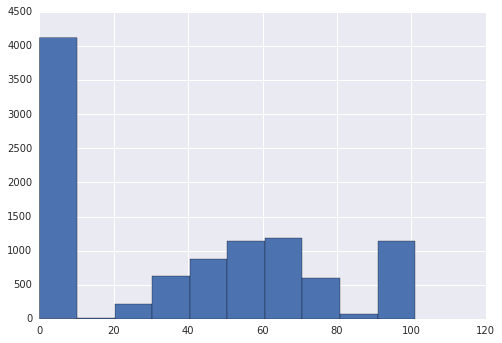

time: 34min 32s


In [29]:
##### MOMA #######

%autoreload
keys = ['wiki+googleart+wga+meisterwerke', 'moma']
mask = (artists_with_years_dict['moma']['wikidata_qid'].notnull() | 
        artists_with_years_dict['moma']['years_bio'].notnull() |
        artists_with_years_dict['moma']['works_count'] > 0)
artists_with_years_dict['moma'] = artists_with_years_dict['moma'][mask].copy()
get_sim_matrix_and_plot(keys, force=True, n_jobs=40, num_blocks=160)

In [30]:
##### MOMA #######
%autoreload
dataset_names = ['wiki+googleart+wga+meisterwerke', 'moma']
results_df = []
results_df = check_pairs(dataset_names, 
                transpose=False,
                min_sim=84, max_sim=101, 
                discard_exaclty_matched_dates=True,
                min_k=1,
                min_total_works_count=0)

if len(results_df):
    results_df['year_diff'] = results_df.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)
results_df

# Transposed
results_df_transposed = []
results_df_transposed = check_pairs(dataset_names, 
                transpose=True,
                min_sim=84, max_sim=101, 
                discard_exaclty_matched_dates=True,
                min_k=1,
                min_total_works_count=0)
if len(results_df_transposed):
    results_df_transposed['year_diff'] = results_df_transposed.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)

if len(results_df) and len(results_df_transposed):
    appended = results_df.append(results_df_transposed, ignore_index=True)
    appended = appended.drop_duplicates(['artist_id_' + key for key in dataset_names])
    appended = appended[results_df.columns]
#     assert len(appended['artist_id_meisterwerke'].unique()) == len(appended), len(appended['artist_id_meisterwerke'].unique())
    appended.sort_values(by='artist_id_' + dataset_names[0], inplace=True)
elif len(results_df):
    appended = results_df
elif len(results_df_transposed):
    appended = results_df_transposed
else:
    appended = pd.DataFrame()
    
# appended.sort_values(by='artist_id_wiki+googleart+wga', inplace=True)
# appended.sort_values(by='artist_id_meisterwerke', inplace=True)


from os.path import expanduser
output_path = expanduser('~/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names)))
appended.to_csv(output_path, encoding='utf-8')
print 'Total rows', len(appended)
print dataset_names
appended
# duplicates_df = get_pairs_from_the_same_dataset(dataset_names[::-1], appended, min_sim=100)
# output_path = expanduser('~/workspace/dataset_merger/aggregated/{}_duplicates.csv'.format(dataset_names[1]))
# duplicates_df.to_csv(output_path, encoding='utf-8')
# duplicates_df

manually_corrected_matches/wiki+googleart+wga+meisterwerke-moma_manually_corrected_matches.csv
manually checked pairs: 334
count: 0
0
manually_corrected_matches/wiki+googleart+wga+meisterwerke-moma_manually_corrected_matches.csv
manually checked pairs: 334
count: 0
0
Total rows 0
['wiki+googleart+wga+meisterwerke', 'moma']


""


time: 13.8 s


In [31]:
%autoreload
dataset_names = ['wiki+googleart+wga+meisterwerke', 'moma']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

merged_df = get_merged_artists_df(dataset_names, dfs_to_merge, sim, 
                                  split_big_components=False, 
                                  allow_big_components=False)
merged_df = merged_df[merged_df['works_count'] > 0]
artists_with_years_dict['+'.join(dataset_names)] = merged_df
print 'Num unique artists:', len(merged_df)
# merged_df.to_hdf('info/artists_{}_v0.93.hdf5'.format('+'.join(dataset_names)), 'df', mode='w')
merged_df.head()

  0%|          | 0/10000 [00:00<?, ?it/s]  0%|          | 4/10000 [00:00<04:45, 35.03it/s]

connected_components at the beginning: 21632


  0%|          | 81/20546 [00:00<00:25, 798.50it/s]

connected_components: 20546
big_components number: 0


100%|██████████| 20546/20546 [00:17<00:00, 1164.03it/s]%|          | 241/20546 [00:00<00:25, 798.94it/s]


Num unique artists: 12000


,art_institution,art_movement,artist_id_degruyter,artist_ids,artist_name,artist_names,artist_page_id,bio,bio_short,birth_date,born-died,date_of_birth,date_of_death,death_date,description,field,friends_and_co-workers,gender,genre,geographical_data,influenced_by,influenced_on,nationality,occupation,page_url,painting_school,place_of_birth,place_of_death,style,ulan_id,url_wiki,wikidata_qid,works_count,years,years_bio,years_range,years_work,artist_id
artist_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
moma_mdvt-robert-del-naja-32475,NaN,[street art],NaN,"[moma_mdvt-robert-del-naja-32475, wiki_3d]",3d,"[robert del naja, 3d]",32475.0,NaN,"british, born 1965",21 january 1966,NaN,NaN,NaN,NaN,NaN,"[painting, printmaking, drawing]",NaN,male,[graffiti],NaN,NaN,NaN,[british],NaN,NaN,NaN,"bristol, united kingdom",NaN,NaN,nan,https://en.wikipedia.org/wiki/Robert_Del_Naja,Q712176,10,"[1984.0, 1986.0, 1988.0, 1991.0, 1994.0, 1983.0]","[1965, 2099]","[1965, 2099]","[1983.0, 1994.0]",moma_mdvt-robert-del-naja-32475
wiki_a-y-jackson,NaN,[art nouveau],NaN,[wiki_a-y-jackson],a.y. jackson,"[alexander young jackson, a.y. jackson]",NaN,NaN,NaN,03 october 1882,NaN,NaN,NaN,05 april 1974,NaN,[painting],NaN,NaN,[landscape],NaN,NaN,NaN,[canadian],NaN,NaN,[group of seven],"montreal, quebec, canada","kleinburg, ontario, canada",NaN,NaN,https://en.wikipedia.org/wiki/A._Y._Jackson,Q3499926,30,"[1920.0, 1953.0, 1921.0, 1923.0, 1926.0, 1927....","[1882, 1974]","[1882, 1974]","[1910.0, 1953.0]",wiki_a-y-jackson
wiki_abanindranath-tagore,NaN,NaN,_00150743,"[wiki_abanindranath-tagore, googleart_m0632pc]",abanindranath tagore,"[tagore, abanindra nath, abanindranath tagore,...",NaN,Abanindranath Tagore was the principal artist ...,NaN,07 august 1871,NaN,NaN,NaN,05 december 1951,first indian artist to gain international reco...,[painting],NaN,male,NaN,NaN,NaN,NaN,[india],NaN,[https://www.google.com/culturalinstitute/beta...,[bengal school],kalkutta; kolkata; calcutta (west bengal),kalkutta; kolkata; calcutta (west bengal),NaN,NaN,https://en.wikipedia.org/wiki/Abanindranath_Ta...,Q691796,138,"[1920.0, 1924.0, 1927.0, 1929.0, 1930.0, 1906....","[1871, 1951]","[1871, 1951]","[1897.0, 1939.0]",wiki_abanindranath-tagore
wiki_abdul-qader-al-raes,NaN,[contemporary],NaN,[wiki_abdul-qader-al-raes],abdul qader al raes,[abdul qader al raes],NaN,NaN,NaN,1951,NaN,NaN,NaN,NaN,NaN,[painting],NaN,NaN,[calligraphy],NaN,NaN,NaN,[emirati],NaN,NaN,NaN,"dubai, united arab emirates",NaN,NaN,NaN,https://en.wikipedia.org/wiki/Abdul_Qader_Al_Rais,Q4665587,17,"[2008.0, 1995.0, 2011.0, 1998.0, 2007.0]","[1951, 2099]","[1951, 2099]","[1995.0, 2011.0]",wiki_abdul-qader-al-raes
wiki_abdullah-suriosubroto,NaN,[realism],NaN,[wiki_abdullah-suriosubroto],abdullah suriosubroto,[abdullah suriosubroto],NaN,NaN,NaN,1878,NaN,NaN,NaN,1941,NaN,[painting],NaN,NaN,[landscape],NaN,NaN,NaN,[indonesian],NaN,NaN,NaN,"semarang, indonesia","yogyakarta, indonesia",NaN,NaN,https://id.wikipedia.org/wiki/Abdullah_Suriosu...,Q10989181,18,NaN,"[1878, 1941]","[1878, 1941]",NaN,wiki_abdullah-suriosubroto


time: 5min 15s


In [32]:
for key in artists_with_years_dict.keys():
    print '{}: {} unique artists'.format(key, len(artists_with_years_dict[key]))

wiki: 2378 unique artists
wiki+googleart+wga+meisterwerke: 10000 unique artists
wga: 4573 unique artists
wiki+googleart+wga+meisterwerke+moma: 12000 unique artists
wiki+googleart+wga: 8915 unique artists
artuk: 33050 unique artists
meisterwerke: 2218 unique artists
googleart: 4083 unique artists
moma: 11632 unique artists
wiki+googleart: 5710 unique artists
time: 3.57 ms


Num artists now: 23392
wiki+googleart+wga+meisterwerke+moma-artuk


  0%|          | 0/160 [00:00<?, ?it/s]

Num tasks: 160


100%|██████████| 160/160 [59:22<00:00, 160.38s/it]  
[Parallel(n_jobs=40)]: Done 160 out of 160 | elapsed: 97.0min finished


Sim matrix saved to sim_matrix_wiki+googleart+wga+meisterwerke+moma-artuk.npy
(12000, 23392)


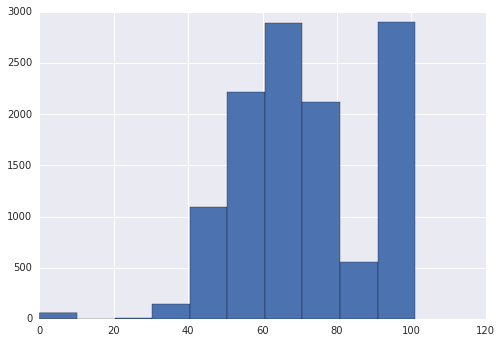

time: 1h 37min 13s


In [33]:
##### ARTUK #######
%autoreload
keys = ['wiki+googleart+wga+meisterwerke+moma', 'artuk']
# artists_with_years_dict['artuk'] = get_artists_with_years('artuk', dfs)
mask = (artists_with_years_dict['artuk']['years_bio'].notnull() |
        artists_with_years_dict['artuk']['wikidata_qid'].notnull() | 
        artists_with_years_dict['artuk']['artist_id_degruyter'].notnull() | 
        (artists_with_years_dict['artuk']['works_count'] >= 4))
artists_with_years_dict['artuk'] = artists_with_years_dict['artuk'].loc[mask].copy()
print 'Num artists now:', len(artists_with_years_dict['artuk'])
get_sim_matrix_and_plot(keys, force=True, n_jobs=40, num_blocks=160)

In [37]:
##### ARTUK #######
%autoreload
dataset_names = ['wiki+googleart+wga+meisterwerke+moma', 'artuk']
discard_exaclty_matched_dates = False
max_sim = 121
min_k = 2

results_df = []
results_df = check_pairs(dataset_names, 
                transpose=False,
                min_sim=87, max_sim=max_sim, 
                discard_exaclty_matched_dates=discard_exaclty_matched_dates,
                min_k=min_k,
                min_total_works_count=0)

if len(results_df):
    results_df['year_diff'] = results_df.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)
results_df

# Transposed
results_df_transposed = []
results_df_transposed = check_pairs(dataset_names, 
                transpose=True,
                min_sim=87, max_sim=max_sim, 
                discard_exaclty_matched_dates=discard_exaclty_matched_dates,
                min_k=min_k,
                min_total_works_count=0)
if len(results_df_transposed):
    results_df_transposed['year_diff'] = results_df_transposed.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)

if len(results_df) and len(results_df_transposed):
    appended = results_df.append(results_df_transposed, ignore_index=True)
    appended = appended.drop_duplicates(['artist_id_' + key for key in dataset_names])
    appended = appended[results_df.columns]
#     assert len(appended['artist_id_meisterwerke'].unique()) == len(appended), len(appended['artist_id_meisterwerke'].unique())
    appended.sort_values(by='artist_id_' + dataset_names[0], inplace=True)
elif len(results_df):
    appended = results_df
elif len(results_df_transposed):
    appended = results_df_transposed
else:
    appended = pd.DataFrame()
    
# appended.sort_values(by='artist_id_wiki+googleart+wga', inplace=True)
# appended.sort_values(by='artist_id_meisterwerke', inplace=True)


from os.path import expanduser
output_path = expanduser('~/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names)))
appended.to_csv(output_path, encoding='utf-8')
print 'Total rows', len(appended)
print dataset_names
appended
# duplicates_df = get_pairs_from_the_same_dataset(dataset_names[::-1], appended, min_sim=100)
# output_path = expanduser('~/workspace/dataset_merger/aggregated/{}_duplicates.csv'.format(dataset_names[1]))
# duplicates_df.to_csv(output_path, encoding='utf-8')
# duplicates_df

manually_corrected_matches/wiki+googleart+wga+meisterwerke+moma-artuk_manually_corrected_matches.csv
manually checked pairs: 2084
count: 0
0
manually_corrected_matches/wiki+googleart+wga+meisterwerke+moma-artuk_manually_corrected_matches.csv
manually checked pairs: 2084
count: 0
0
Total rows 0
['wiki+googleart+wga+meisterwerke+moma', 'artuk']


""


time: 2min 3s


In [ ]:
%autoreload
dataset_names = ['wiki+googleart+wga+meisterwerke+moma', 'artuk']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

merged_df = get_merged_artists_df(dataset_names, dfs_to_merge, sim, 
                                  split_big_components=False, 
                                  allow_big_components=False)
merged_df = merged_df[merged_df['works_count'] > 0]
artists_with_years_dict['+'.join(dataset_names)] = merged_df
print 'Num unique artists:', len(merged_df)
# merged_df.to_hdf('info/artists_{}_v0.93.hdf5'.format('+'.join(dataset_names)), 'df', mode='w')
merged_df.head()

  0%|          | 0/12000 [00:00<?, ?it/s]  0%|          | 2/12000 [00:00<13:03, 15.30it/s]

connected_components at the beginning: 35392


 31%|███       | 3742/12000 [04:26<09:41, 14.21it/s]%|          | 4/12000 [00:00<16:49, 11.89it/s]

In [ ]:
##### RIJKS #######
%autoreload
keys = ['wiki+googleart+wga+meisterwerke+moma+artuk', 'rijks']
dfs['rijks'] = dataset_merger.read_datasets.read_datasets(names=['rijks'])['rijks']
artists_with_years_dict['rijks'] = get_artists_with_years('rijks', dfs)
# mask = (artists_with_years_dict['rijks']['wikidata_qid'].notnull() | 
#         artists_with_years_dict['rijks']['artist_id_degruyter'].notnull() | 
#        (artists_with_years_dict['rijks']['works_count'] > 10))
# artists_with_years_dict['rijks'] = artists_with_years_dict['rijks'].loc[mask].copy()
print 'Num artists now:', len(artists_with_years_dict['rijks'])
get_sim_matrix_and_plot(keys, force=True, n_jobs=40, num_blocks=160)

In [ ]:
##### RIJKS #######
%autoreload
dataset_names = ['wiki+googleart+wga+meisterwerke+moma+artuk', 'rijks']
results_df = []
results_df = check_pairs(dataset_names, 
                transpose=False,
                min_sim=89, max_sim=121, 
                discard_exaclty_matched_dates=False,
                min_k=2,
                min_total_works_count=0)

if len(results_df):
    results_df['year_diff'] = results_df.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)
results_df

# Transposed
results_df_transposed = []
results_df_transposed = check_pairs(dataset_names, 
                transpose=True,
                min_sim=89, max_sim=121, 
                discard_exaclty_matched_dates=False,
                min_k=2,
                min_total_works_count=0)
if len(results_df_transposed):
    results_df_transposed['year_diff'] = results_df_transposed.apply(lambda x: [abs(x['dates_' + dataset_names[0]][i] - x['dates_' + dataset_names[1]][i]) for i in range(2)], axis=1)

if len(results_df) and len(results_df_transposed):
    appended = results_df.append(results_df_transposed, ignore_index=True)
    appended = appended.drop_duplicates(['artist_id_' + key for key in dataset_names])
    appended = appended[results_df.columns]
#     assert len(appended['artist_id_meisterwerke'].unique()) == len(appended), len(appended['artist_id_meisterwerke'].unique())
    appended.sort_values(by='artist_id_' + dataset_names[0], inplace=True)
elif len(results_df):
    appended = results_df
elif len(results_df_transposed):
    appended = results_df_transposed
else:
    appended = pd.DataFrame()
    
# appended.sort_values(by='artist_id_wiki+googleart+wga', inplace=True)
# appended.sort_values(by='artist_id_meisterwerke', inplace=True)


from os.path import expanduser
output_path = expanduser('~/workspace/dataset_merger/aggregated/{}_check_matches.csv'.format('-'.join(dataset_names)))
appended.to_csv(output_path, encoding='utf-8')
print 'Total rows', len(appended)
print dataset_names
appended

In [ ]:
%autoreload
dataset_names = ['wiki+googleart+wga+meisterwerke+moma+artuk', 'rijks']
sim = sim_matrix['-'.join(dataset_names)]
dfs_to_merge = [artists_with_years_dict[key] for key in dataset_names]

merged_df = get_merged_artists_df(dataset_names, dfs_to_merge, sim, 
                                  split_big_components=False, 
                                  allow_big_components=True)
merged_df = merged_df[merged_df['works_count'] > 0]
artists_with_years_dict['+'.join(dataset_names)] = merged_df
print 'Num unique artists:', len(merged_df)
merged_df.to_hdf('info/artists_{}_v1.02.hdf5'.format('+'.join(dataset_names)), 'df', mode='w')
merged_df.head()